In [5]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

In [35]:
#Opening and testing data

image_data = "Flats\\Flatlight\\Blue\\Light_Blue_0.099_secs_001.fits"

hdu_list = fits.open(image_data)
hdu_list.info()

image_data = hdu_list[0].data

print(type(image_data))
print(image_data.shape)

hdu_list.close()

print(type(image_data))
print(image_data.shape)

plt.imshow(image_data, cmap='gray')
plt.colorbar()

print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

FileNotFoundError: [Errno 2] No such file or directory: 'Flats\\Flatlight\\Blue\\Light_Blue_0.099_secs_001.fits'

In [7]:
image_list = []
n = 0

#With flat light

#blue filter
filepath = "4-3 Calibration\\Flats\\Flatlight\\Blue\\"


for file in glob.glob(filepath+"Light_Blue*.fits"):
    image_list.append(file)
    n=n+1
print("\n".join(image_list))

4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_001.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_002.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_003.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_004.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_005.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_006.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_007.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_008.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_009.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_010.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_011.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_012.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_013.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_014.fits
4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_

In [8]:
image_concat = []

image_concat = [fits.getdata(image) for image in image_list]

hdu_number = 0 # HDU means header data unit
image_hdr = [fits.getheader(image, hdu_number) for image in image_list]

In [9]:
N_images = np.shape(image_concat)
print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

image_concat[0]

(15, 3520, 4656)
15


array([[28896, 28768, 28992, ..., 28896, 28720, 29712],
       [28896, 28768, 27696, ..., 28592, 29312, 28688],
       [28544, 28592, 29168, ..., 30576, 29440, 29680],
       ...,
       [28768, 28448, 27824, ..., 29200, 29472, 29776],
       [27424, 29600, 29648, ..., 28496, 29152, 28400],
       [28960, 28096, 28704, ..., 28880, 29152, 28400]], dtype=uint16)

The ZWo amera is 12 bit, but it sclaes the output to 16 bit, so a 2^4=16 difference. We need ot rmeove that

In [10]:
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] /16

Now get ready to subtract off the appropraite master bias image from each

In [11]:


masterbias_image = fits.getdata(biasfilepath)

plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterbias_image) )
print('Max:', np.max(masterbias_image)  )    
print('Mean:', np.mean(masterbias_image)  )
print('Median', np.median(masterbias_image)  )
print('Stdev:', np.std(masterbias_image)  )

plt.subplot(1,2,1)
plt.imshow(masterbias_image, cmap='gray', 
               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) 
plt.title("Master Bias")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))
plt.yscale('log')
  
plt.show()

for i in range(N_images[0]):
    image_concat[i] = image_concat[i] - masterbias_image
    

'\nmasterbias_image = fits.getdata(biasfilepath)\n\nplt.figure(figsize=(15,6))\n\nN_std = 1.5\n\nprint(\'Min:\', np.min(masterbias_image) )\nprint(\'Max:\', np.max(masterbias_image)  )    \nprint(\'Mean:\', np.mean(masterbias_image)  )\nprint(\'Median\', np.median(masterbias_image)  )\nprint(\'Stdev:\', np.std(masterbias_image)  )\n\nplt.subplot(1,2,1)\nplt.imshow(masterbias_image, cmap=\'gray\', \n               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) \nplt.title("Master Bias")\nplt.colorbar()\n\n\nplt.subplot(1,2,2)\nplt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))\nplt.yscale(\'log\')\n  \nplt.show()\n\nfor i in range(N_images[0]):\n    image_concat[i] = image_concat[i] - masterbias_image\n    \n'

Now get ready to subtract off the appropraite master dark image from each

In [12]:

masterdark_image = fits.getdata(barkfilepath)

plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterdark_image) )
print('Max:', np.max(masterdark_image)  )    
print('Mean:', np.mean(masterdark_image)  )
print('Median', np.median(masterdark_image)  )
print('Stdev:', np.std(masterdark_image)  )

plt.subplot(1,2,1)
plt.imshow(masterdark_image, cmap='gray', 
               vmin= np.median(masterdark_image) - N_std*np.std(masterdark_image), vmax=np.median(masterdark_image) + N_std*np.std(masterdark_image)) 
plt.title("Master Dark")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterdark_image.flatten(),bins=int(np.max(masterdark_image)))
plt.yscale('log')
  
plt.show()

"""

'\nmasterdark_image = fits.getdata(barkfilepath)\n\nplt.figure(figsize=(15,6))\n\nN_std = 1.5\n\nprint(\'Min:\', np.min(masterdark_image) )\nprint(\'Max:\', np.max(masterdark_image)  )    \nprint(\'Mean:\', np.mean(masterdark_image)  )\nprint(\'Median\', np.median(masterdark_image)  )\nprint(\'Stdev:\', np.std(masterdark_image)  )\n\nplt.subplot(1,2,1)\nplt.imshow(masterdark_image, cmap=\'gray\', \n               vmin= np.median(masterdark_image) - N_std*np.std(masterdark_image), vmax=np.median(masterdark_image) + N_std*np.std(masterdark_image)) \nplt.title("Master Dark")\nplt.colorbar()\n\n\nplt.subplot(1,2,2)\nplt.hist(masterdark_image.flatten(),bins=int(np.max(masterdark_image)))\nplt.yscale(\'log\')\n  \nplt.show()\n\n'

We need to scale the per-second dark frame so let's find the mean exposure time of this set of flat frames.

In [13]:

exposures = np.zeros(N_images[0])

for n in range(N_images[0]):
    exposures[n] = image_hdr[n]["EXPTIME "]
print(exposures)
mean_exp = np.mean(exposures)
print(mean_exp)

for i in range(N_images[0]):
    image_concat[i] = image_concat[i] - masterdark_image * mean_exp
    
image_hdr[0]

for n in range(N_images[0]):
    camera_temp = image_hdr[n]["CCD-TEMP"]
    print('Camera temp = ',str(camera_temp), ' C')
    
for n in range(N_images[0]):
    exposure = image_hdr[n]["EXPTIME "]
    print('Flat Exposure time= ',str(exposure))


'\nexposures = np.zeros(N_images[0])\n\nfor n in range(N_images[0]):\n    exposures[n] = image_hdr[n]["EXPTIME "]\nprint(exposures)\nmean_exp = np.mean(exposures)\nprint(mean_exp)\n\nfor i in range(N_images[0]):\n    image_concat[i] = image_concat[i] - masterdark_image * mean_exp\n    \nimage_hdr[0]\n\nfor n in range(N_images[0]):\n    camera_temp = image_hdr[n]["CCD-TEMP"]\n    print(\'Camera temp = \',str(camera_temp), \' C\')\n    \nfor n in range(N_images[0]):\n    exposure = image_hdr[n]["EXPTIME "]\n    print(\'Flat Exposure time= \',str(exposure))\n\n'

Make various arrays of zeros so I can store various stat things about each of the images.

In [14]:
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

Now cycle through each image, plot, work out some stats of each image and a histrogram. This is the first chance to see if there are any dodgy images that once identified can be cut from the original directory if required. Maybe there is a satelite, or a off flash or a UFO.

To make the plots below look ok, we spread the gray scale from the mean  ±
  some number of standard deviations. You can play with that number to make the plots more useful. Here I've stuck with a linear scale, but you can set to log if you wish.

4-3 Calibration\Flats\Flatlight\Blue\Light_Blue_0.099_secs_015.fits
Min: 1139.0
Max: 1834.0
Mean: 1488.5504019129764
Median 1487.0
Stdev: 77.63210905369523


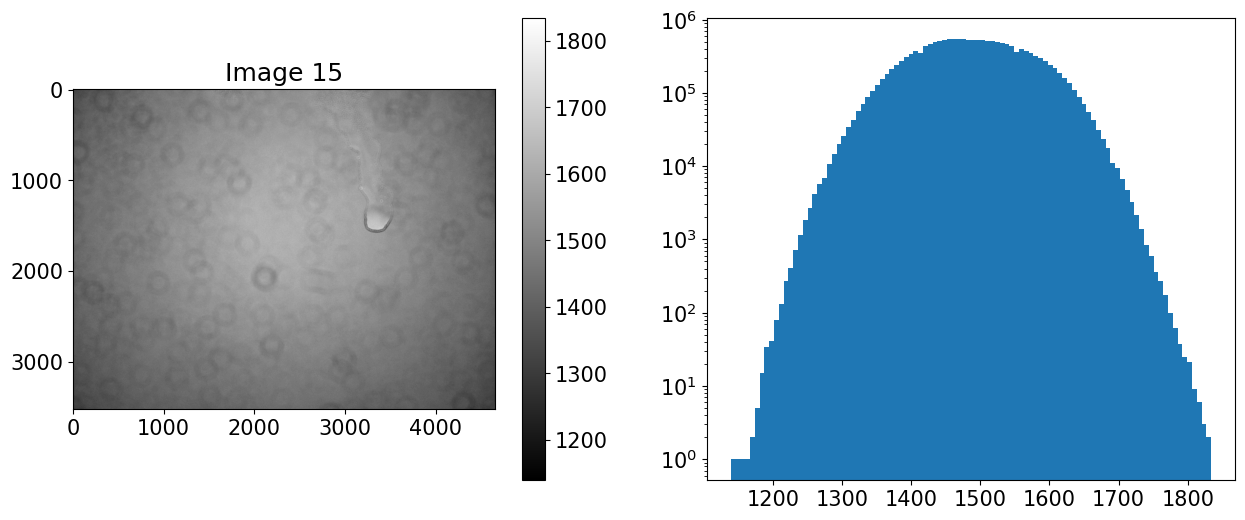

In [15]:
N_std = 0.2


for i in range(N_images[0]):
    clear_output(wait=True)

    plt.figure(figsize=(15,6))
    
    print(image_list[i])
    image_min[i] = np.min(image_concat[i])
    image_max[i] = np.max(image_concat[i])
    image_mean[i] = np.mean(image_concat[i])
    image_median[i] = np.median(image_concat[i])
    image_stdev[i] = np.std(image_concat[i])

    
    
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )


    
    plt.subplot(1,2,1)
    plt.imshow(image_concat[i], cmap='gray'), 
    #vmin= image_mean[i] - N_std*image_stdev[i], vmax=image_mean[i] + N_std*image_stdev[i] 
    plt.title("Image "+ str(i+1))
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.hist(image_concat[i].flatten(),bins=100)
    plt.yscale('log')
  
    plt.show()
    
    time.sleep(1) #pause in secs. Make bigger if you need.

In [16]:

plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(flat_min,'ko',label='min')
plt.plot(flat_max,'ro',label='max')
plt.plot(flat_mean, 'bx', label='mean')
plt.plot(flat_median,'gx',label='median')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()


plt.subplot(1,2,2)
plt.plot(flat_stdev,'ko',label='Std')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()



plt.show()


"\nplt.figure(figsize=(17,6))\n\nplt.subplot(1,2,1)\nplt.plot(flat_min,'ko',label='min')\nplt.plot(flat_max,'ro',label='max')\nplt.plot(flat_mean, 'bx', label='mean')\nplt.plot(flat_median,'gx',label='median')\n\nplt.xlabel('Image number')\nplt.ylabel('Counts')\n\nplt.legend()\n\n\nplt.subplot(1,2,2)\nplt.plot(flat_stdev,'ko',label='Std')\n\nplt.xlabel('Image number')\nplt.ylabel('Counts')\n\nplt.legend()\n\n\n\nplt.show()\n\n"

Note, offentimes in the above image stats anaylysi the mean and hte median are nearly identical. And note that I think the np.ted returns the standard deviation of the inputs, not the standard deviation of the mean. Hence the second figure of the std will be  ±
  something and not some tiny number.

Right now we can get onto the pixel by pixel analysis. Unlike the stuff above, which is per image, we care about per pixel. Given there are a few bias frames, it is as if we have measured the bias value of a pixel N times. So that's what we want to look at.

Let's do for 1 pixel first and build from there.

We'll also create a new array which is just a plain 3D array of integers so we can easily to maths across all images.

In [17]:
all_data = np.zeros(N_images)
for i in range(N_images[0]):
    all_data[i,:,:] = image_concat[i]

In [18]:
NyPix = np.shape(all_data)[1]
NxPix = np.shape(all_data)[2]
print(NxPix,NyPix)

4656 3520


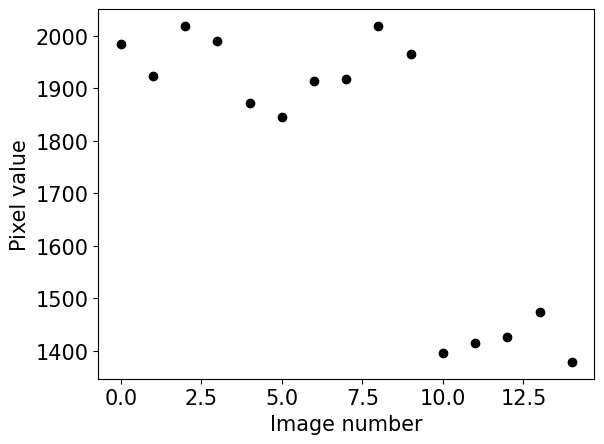

In [19]:
x = int(random.randint(1, NxPix))
y = int(random.randint(1, NyPix))

plt.plot(all_data[:,y,x],'ko' )

plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

So there is some variation due to the inherent noise on the bias and the noise introduced by reading the image as well. Let's plot a few of these just to see what they look like. If I was being really good I'd randommly select some pixels, but I can't be bothered.

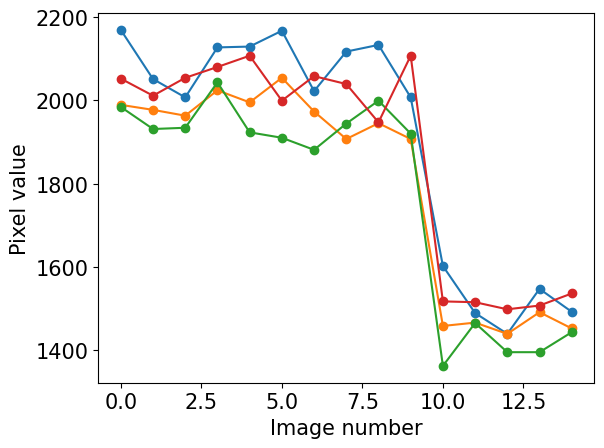

In [20]:
x_list = np.zeros(4)
y_list =  np.zeros(4)
x_list = [random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix)]
y_list = [random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix)]

for i in range(4):
    plt.plot(all_data[:,y_list[i],x_list[i]],'-o')



plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

So we can see for these there is a similar distribution for each pixel. Now let's work out the standard deviation, since we have a nice 3D array this should be easy to do. Since our first dimension 0 is the image number that's what we want to compute ove

In [21]:
pixels_std = np.std(all_data, axis=0)    #Breaks my laptop, not enough storage

In [22]:
np.shape(pixels_std)

(3520, 4656)

So we now have a new array where each entry if the std of the bias over the N bias images pixel by pixel. Let's have a quick look at it as a histogram.

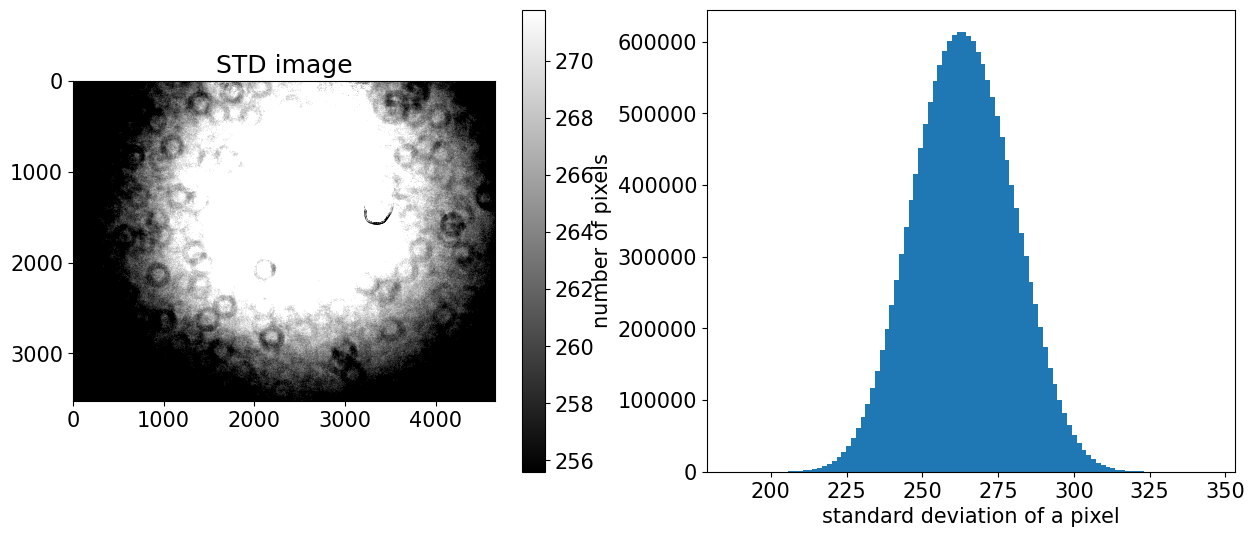

In [23]:
plt.figure(figsize=(15,6))

N_std = 0.5

std_mean = np.mean(pixels_std)
std_std = np.std(pixels_std)

plt.subplot(1,2,1)
plt.imshow(pixels_std, cmap='gray',
           vmin= std_mean - N_std*std_std, vmax=std_mean + N_std*std_std)
plt.title("STD image")
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(pixels_std.flatten(),bins=100)
plt.xlabel('standard deviation of a pixel')
plt.ylabel('number of pixels')


plt.show()

So I think we're in a position to compute the overall uncertainty on a raw bias value, the measn across all of the above values.

In [24]:
Uncertainty_flat = np.median(pixels_std)
print(Uncertainty_flat)

263.53418500579136


In [25]:
print('Flat uncertainty: {0:.3f} counts'.format(Uncertainty_flat))

Flat uncertainty: 263.534 counts


In [26]:
master_flat = np.median(all_data, axis=0)

Min: 1677.0
Max: 2382.0
Mean: 2010.1417152964893
Median 2006.0
Stdev: 93.78236443159759
Total sum: 32944453789.0


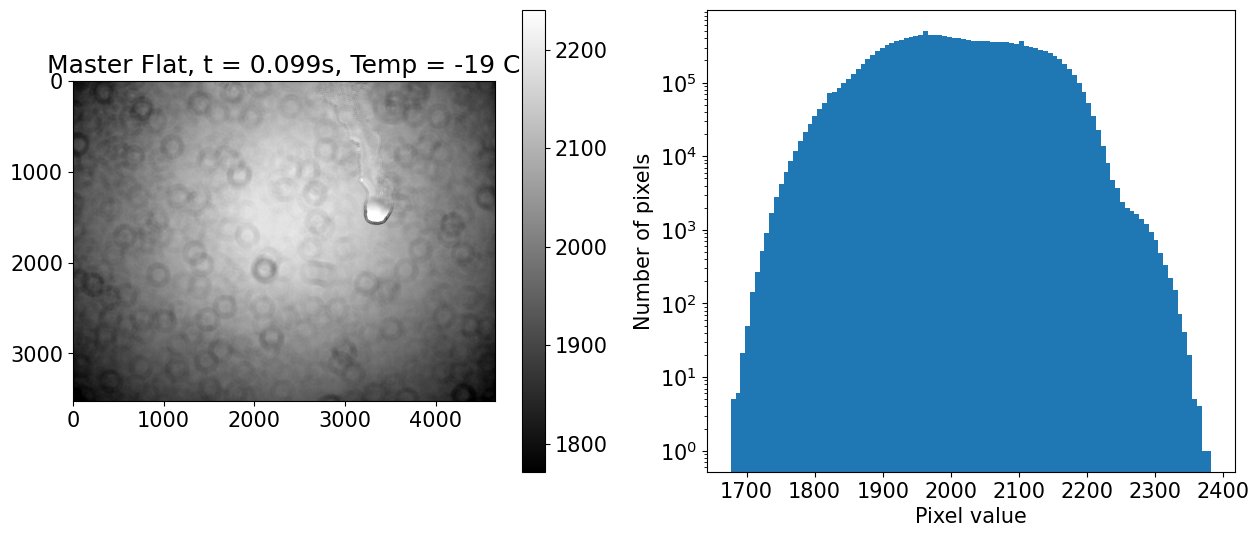

In [29]:
plt.figure(figsize=(15,6))

exposure = 0.099
            
    
N_std = 2.5
camera_temp = -19
    
print('Min:', np.min(master_flat) )
print('Max:', np.max(master_flat)  )    
print('Mean:', np.mean(master_flat)  )
print('Median', np.median(master_flat)  )
print('Stdev:', np.std(master_flat)  )
print('Total sum:',np.sum(master_flat))


    
plt.subplot(1,2,1)
plt.imshow(master_flat, cmap='gray', 
               vmin= np.median(master_flat) - N_std*np.std(master_flat), vmax=np.median(master_flat) + N_std*np.std(master_flat)) 
plt.title('Master Flat, t = '+str(exposure)+'s, Temp = '+str(camera_temp)+' C' )
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(master_flat.flatten(),bins= 100)
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
  
plt.show()
    

In [30]:
outfile = filepath+'master_flat.fits'

hdu = fits.PrimaryHDU(master_flat)
hdu.writeto(outfile, overwrite=True)

In [31]:
stats_data = np.zeros([N_images[0]+2,5])
stats_data[0:N_images[0],0] = image_min
stats_data[0:N_images[0],1] = image_max
stats_data[0:N_images[0],2] = image_mean
stats_data[0:N_images[0],3] = image_median
stats_data[0:N_images[0],4] = image_stdev


# Add master stats at the end
stats_data[-1,0] = np.min(master_flat)
stats_data[-1,1] = np.max(master_flat)
stats_data[-1,2] = np.mean(master_flat)
stats_data[-1,3] = np.median(master_flat)
stats_data[-1,4] = np.std(master_flat)

# Add  stats image at the end
stats_data[-2,0] = np.min(pixels_std)
stats_data[-2,1] = np.max(pixels_std)
stats_data[-2,2] = np.mean(pixels_std)
stats_data[-2,3] = np.median(pixels_std)
stats_data[-2,4] = np.std(pixels_std)

df_stats = pd.DataFrame(data=stats_data,columns=['min','max','mean','median','std'])

In [32]:
image_list.append(filepath+'std_image')
image_list.append(filepath+'master_flat.fits')

df_stats['filename'] = image_listimage_list.append(filepath+'std_image')
image_list.append(filepath+'master_flat.fits')

df_stats['filename'] = image_list

NameError: name 'image_listimage_list' is not defined

In [ ]:
camera_temp = []
exposure = []
camera_filter = []

FILTER  = 'Luminance'

for n in range(N_images[0]):
    camera_temp.append(image_hdr[n]["CCD-TEMP"])
    exposure.append(image_hdr[n]["EXPTIME "])
    camera_filter.append(image_hdr[n]["FILTER "])

# need to do something for the std and master images etc.

mean_temp = np.mean(camera_temp)
mean_exposure = np.mean(exposure)


camera_temp.append(mean_temp)
camera_temp.append(mean_temp)
exposure.append(mean_exposure)
exposure.append(mean_exposure)
camera_filter.append(image_hdr[n]["FILTER "])
camera_filter.append(image_hdr[n]["FILTER "])

df_stats['Temp'] = camera_temp
df_stats['Exposure/s'] = exposure
df_stats['Filter '] = camera_filter

In [ ]:
what_list = []
for i in range(N_images[0]):
    what_list.append('flat')
    
what_list.append('Std_image')
what_list.append('master')



# Make column of "what"
df_stats['what'] = what_list

In [ ]:
df_stats.to_csv(filepath+'flat_stats.csv') #write to file.